This notebook looks at the FANG stocks - Facebook (FB), Amazon (AMZN), Netflix (NFLX) and Google (GOOG), which had an overweighted impact on the S&P500's performance in 2015. I am not going to address valuation in this notebook, but plan to in a later one.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [2]:
# Create FANG list
fang = ["FB", "AMZN", "NFLX", "GOOG"]

# set up start (2 years ago) and end date times
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

#create for loop to grab yahoo finance data and set as dataframe
for stock in fang:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [3]:
#summary stats
FB.describe()

,Open,High,Low,Close,Volume,Adj Close
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000
mean,81.582968,82.530697,80.532669,81.566335,3.609148e+07,81.566335
std,13.581432,13.697789,13.429422,13.595315,2.044273e+07,13.595315
min,55.900002,57.650002,54.660000,56.139999,5.899600e+06,56.139999
25%,74.017502,74.722501,73.170000,73.865000,2.222495e+07,73.865000
50%,78.765000,79.735000,78.064999,78.884998,2.941890e+07,78.884998
75%,92.662498,93.645003,91.325003,92.694998,4.400520e+07,92.694998
max,115.269997,117.589996,113.199997,115.089996,1.387690e+08,115.089996


In [4]:
# general info
FB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2014-02-24 to 2016-02-19
Data columns (total 6 columns):
Open         502 non-null float64
High         502 non-null float64
Low          502 non-null float64
Close        502 non-null float64
Volume       502 non-null int64
Adj Close    502 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


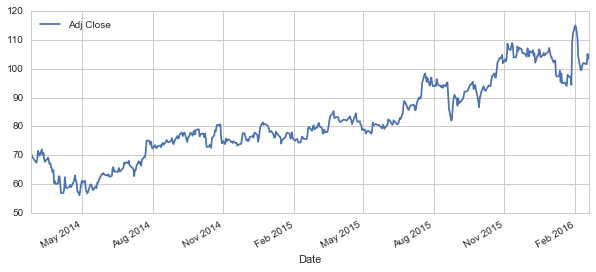

In [5]:
# simple price chart
FB['Adj Close'].plot(legend=True,figsize=(10,4))

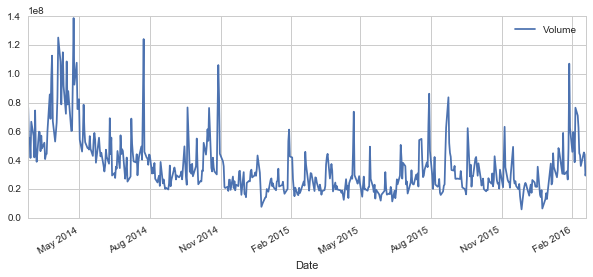

In [6]:
# volumne chart
FB['Volume'].plot(legend=True,figsize=(10,4))

Let's check out the moving averages given the market volatility over the last couple of months (Jan-Feb 2016).  Moving averages are typically used for technical analysis. I will look at 10, 50 and 200 day averages.

In [7]:
ma_day = [10,50,200]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name] = pd.rolling_mean(AMZN['Adj Close'],ma)

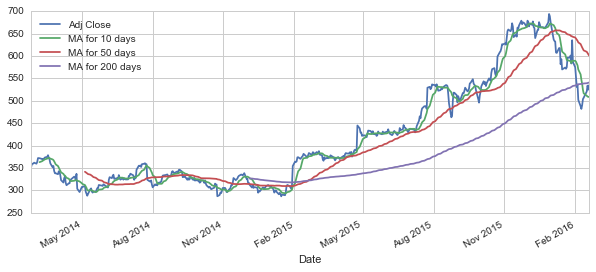

In [8]:
AMZN[['Adj Close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots=False,figsize=(10,4))

In [9]:
# Repeat for other fang companies
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    FB[column_name] = pd.rolling_mean(FB['Adj Close'],ma)
    NFLX[column_name] = pd.rolling_mean(NFLX['Adj Close'],ma)
    GOOG[column_name] = pd.rolling_mean(GOOG['Adj Close'],ma)

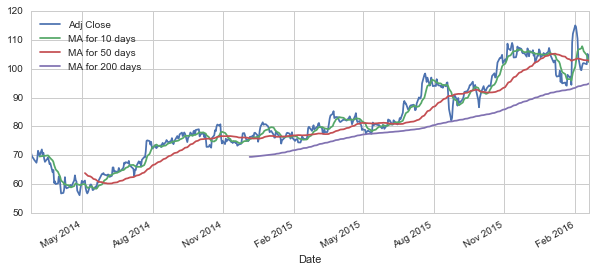

In [10]:
FB[['Adj Close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots=False,figsize=(10,4))

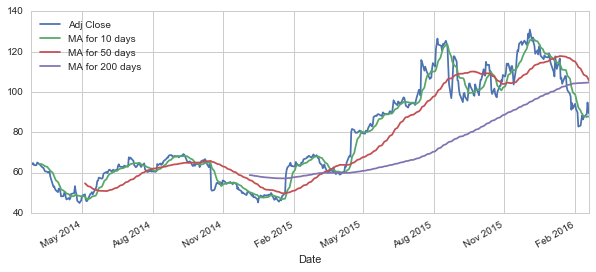

In [11]:
NFLX[['Adj Close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots=False,figsize=(10,4))

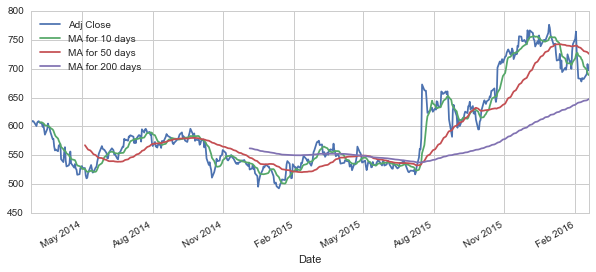

In [12]:
GOOG[['Adj Close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots=False,figsize=(10,4))

So more recently, it looks like AMZN and NFLX have crossed their 50 and 200 day MAs on the downside. FB and GOOG while around their 50 day MA have stayed above their 200 day MA, demonstrating their strong momentum profiles.

In [13]:
# put all closing prices for FANG list into one DataFrame
closing_df = web.DataReader(['FB','AMZN','NFLX','GOOG'],'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-24,351.779999,70.779999,605.650385,63.857143
2014-02-25,358.320007,69.849998,609.391653,64.718575
2014-02-26,359.799988,69.260002,609.476541,64.112854
2014-02-27,360.130005,68.940002,608.997078,64.604286
2014-02-28,362.100006,68.459999,607.218830,63.661430


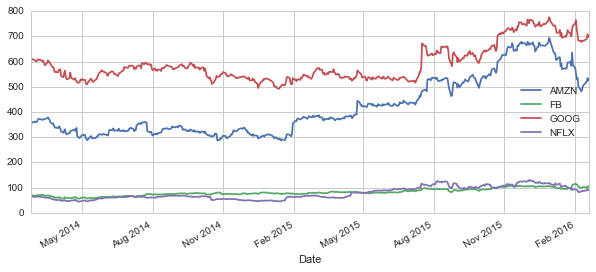

In [15]:
closing_df.plot(legend=True,figsize=(10,4))

In [16]:
# lets make the price chart look a bit better
fang_rets = closing_df.pct_change()
fang_rets.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-24,NaN,NaN,NaN,NaN
2014-02-25,0.018591,-0.013139,0.006177,0.013490
2014-02-26,0.004130,-0.008447,0.000139,-0.009359
2014-02-27,0.000917,-0.004620,-0.000787,0.007665
2014-02-28,0.005470,-0.006963,-0.002920,-0.014594


In [17]:
fang_index = (1 + fang_rets).cumprod()
fang_index.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-24,NaN,NaN,NaN,NaN
2014-02-25,1.018591,0.986861,1.006177,1.013490
2014-02-26,1.022798,0.978525,1.006317,1.004004
2014-02-27,1.023736,0.974004,1.005526,1.011700
2014-02-28,1.029337,0.967222,1.002590,0.996935


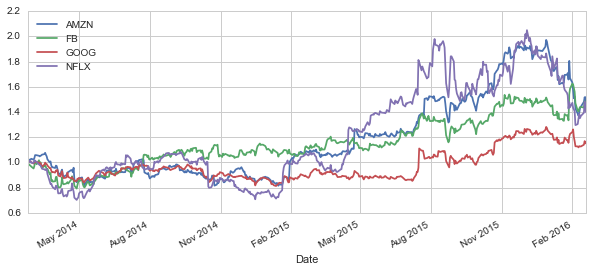

In [18]:
fang_index.plot(legend=True,figsize=(10,4))

It is easy to see that AMZN and NFLX have come off their highs reached near the end of 2015.

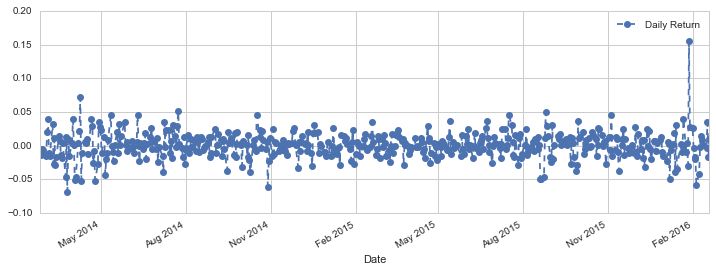

In [19]:
#DAILY RETURN ANALYSIS
FB['Daily Return'] = FB['Adj Close'].pct_change()
FB['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

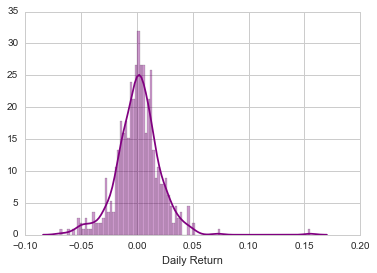

In [20]:
sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

In [21]:
# create dataframe with all returns
rtns_df = closing_df.pct_change()

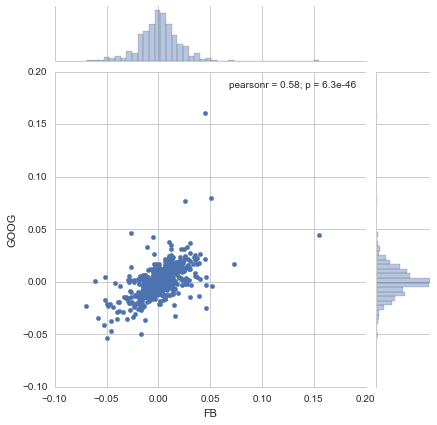

In [22]:
# compare daily returns of a few stocks
sns.jointplot('FB','GOOG',rtns_df,kind='scatter')

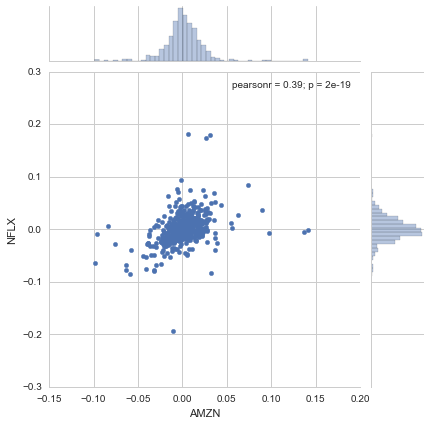

In [23]:
# compare daily returns of a few stocks
sns.jointplot('AMZN','NFLX',rtns_df,kind='scatter')

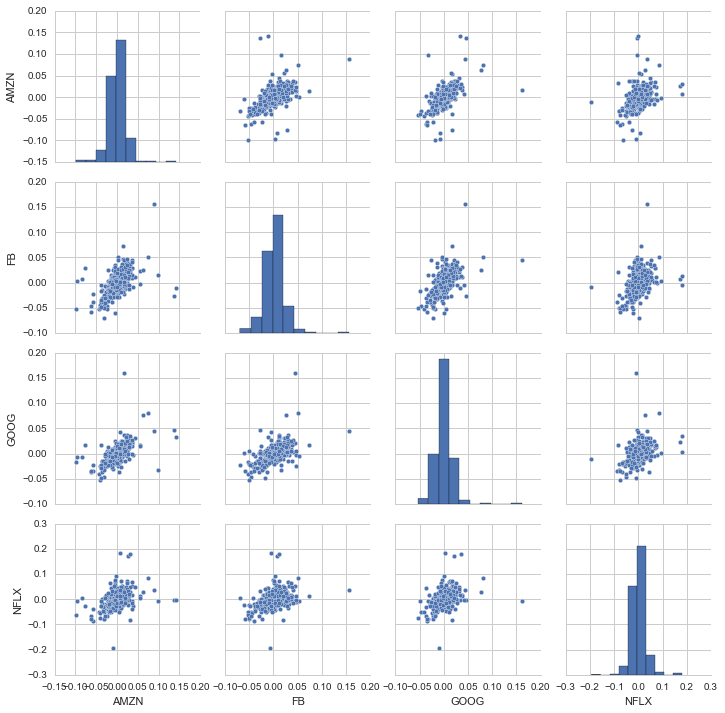

In [24]:
# lets look at all of them
sns.pairplot(rtns_df.dropna())

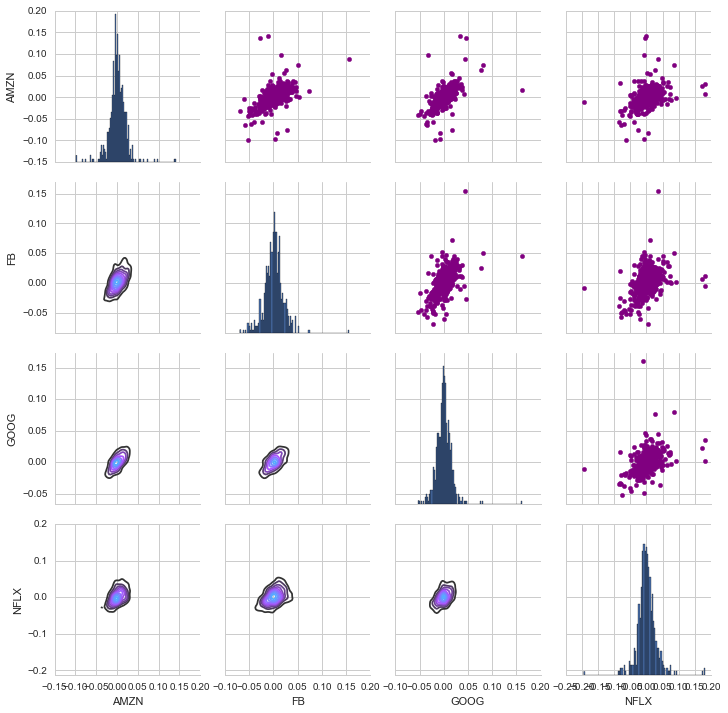

In [25]:
# new figure with name returns_fig
returns_fig = sns.PairGrid(rtns_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# we will define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=100)

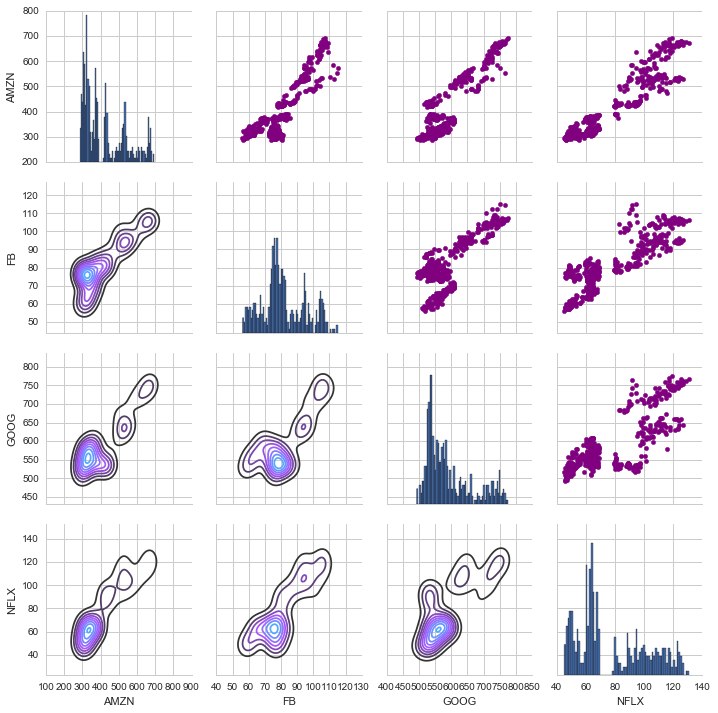

In [26]:
# something a bit different is to look at actual closing prices. we just call the original data frame
# new figure with name returns_fig
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# we will define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=70)

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


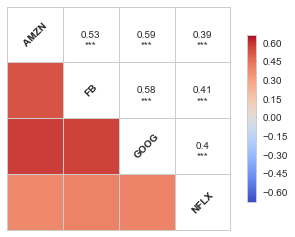

In [27]:
# correlation plot for the daily returns
sns.corrplot(rtns_df.dropna(),annot=True)

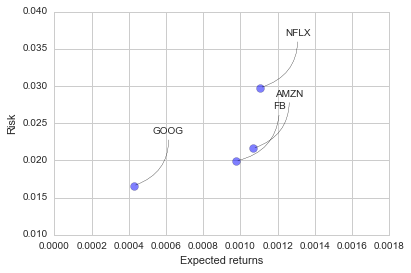

In [28]:
# lets now look at risk
# Define a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = rtns_df.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.04])
plt.xlim([0,0.0018])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.4'))

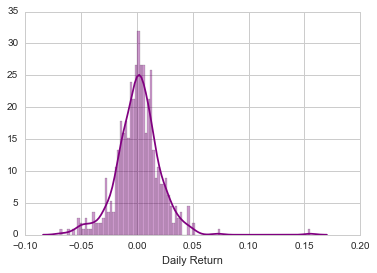

In [29]:
# Here we will look at value at risk
sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

In [30]:
#use quartile to get the risk value for the stock
values = []
for stock in fang:
    i = rets[stock].quantile(0.05)
    values.append(i)
d = dict(zip(fang,values))
d

{'AMZN': -0.03006343066448125,
 'FB': -0.029689738224357498,
 'GOOG': -0.023085850880294689,
 'NFLX': -0.038870371101626056}

In [31]:
#so with 95% confidence, our worst daily loss will not exceed
rets['FB'].quantile(0.05)

-0.029689738224357498

In [33]:
rets['NFLX'].quantile(0.05)

-0.038870371101626056

In [32]:
# this version using dictionary comprehension
dict = {stock:rets[stock].quantile(0.05) for stock in fang}
dict

{'AMZN': -0.03006343066448125,
 'FB': -0.029689738224357498,
 'GOOG': -0.023085850880294689,
 'NFLX': -0.038870371101626056}

In [44]:
# one day 5% VaR for $1 million:
new_dict = {stock: 1000000*rets[stock].quantile(0.05) for stock in fang}
new_dict

{'AMZN': -30063.43066448125,
 'FB': -29689.738224357498,
 'GOOG': -23085.850880294689,
 'NFLX': -38870.371101626057}

On a 1 million investment in FB, with 95 percent confidence, our worst daily loss will not exceed 3 percent or 29,690.

In [45]:
# Value at risk using Monte Carlo simulation
# set up some formulas
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data
mu = rets.mean()['FB']

# Now let's grab the volatility of the stock from the std() of the average 
# return
sigma = rets.std()['FB']

In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [47]:
FB.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 50 days,MA for 200 days,Daily Return
Date,,,,,,,,,,
2014-02-24,68.739998,71.440002,68.540001,70.779999,76620300,70.779999,NaN,NaN,NaN,NaN
2014-02-25,70.949997,71.000000,69.449997,69.849998,52077000,69.849998,NaN,NaN,NaN,-0.013139
2014-02-26,70.190002,71.220001,68.849998,69.260002,55322700,69.260002,NaN,NaN,NaN,-0.008447
2014-02-27,69.339996,70.010002,68.870003,68.940002,41653700,68.940002,NaN,NaN,NaN,-0.004620
2014-02-28,69.470001,69.879997,67.379997,68.459999,66783700,68.459999,NaN,NaN,NaN,-0.006963


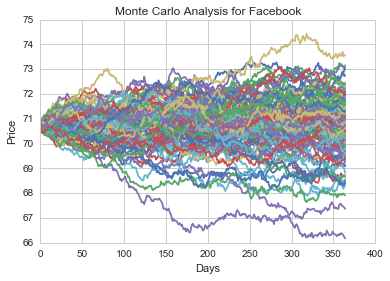

In [48]:
start_price = 70.78

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Facebook')

In [49]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

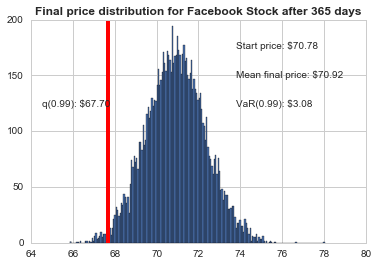

In [50]:
# define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Facebook Stock after %s days" % days, weight='bold');

Looked at the 1 percent empirical quantile of the final price distribution to estimate the Value at Risk for FB stock, which looks to be 3.08 for every investment of 70.78 (the price of one inital FB stock).

This implies that for every initial stock you purchase, you are putting about 3.08 at risk 99 percent of the time from our Monte Carlo Simulation.